<div class="alert alert-block alert-success">
    <h1>DataLab HvA - serie Machine Learning Python - Tech report 1</h1>
</div>

<div class="alert alert-block alert-warning">
    <h2>Introductie Machine Learning</h2>
</div>

### 0. Doel van deze les
Voordat in deze serie Tech Reports ingegaan wordt op verschillende modellen, volgt een introductie op een aantal belangrijke concepten die van toepassing zullen zijn op álle modeltypen die in andere T.R. worden behandeld. De nadruk in dit TR ligt op het verkennen en gereedmaken van de data voor een Machine Learning opdracht.

In deze serie wordt dit T.R. opgevolgd door *Tech Report 2: Datapreparatie*, we raden je aan ook deze door te werken voordat je werkelijk start met modelleren.

**Je leert** 
- de kenmerken van de procedure die algemeen wordt toegepast in Machine Learning taken (CRISP-DM) 
- hoe je met het package `seaborn` eerste visuele verkenningen van de (variatie in de) data kan uitvoeren
- welke type variabelen er in de data kunnen voorkomen

**Je leert niet:**
- hoe je data importeert en inlaadt in de python sessie, zie hiervoor echter wel [deze instructie](https://www.youtube.com/watch?v=1oBVx7pyuXo&list=PLwkTCAI_gJjW10xaAJpdqeQx7EQgFolfG&index=10) 
- een uitgebreide instructie data visualisatie, zie hiervoor ander materiaal van het DataLab of van elders

### 1. CRISP-DM
We werken in deze serie volgens de **Cross-industry standard process for data mining (CRISP-DM)**. Lees hier bijvoorbeeld meer over op [Wikipedia](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining). 

Data Mining is het proces van het zoeken naar patronen in (grote) datasets waarbij o.a. technieken uit machine learning en statistiek worden toegepast. Wij hebben de focus hier op de component machine learning. De zes hoofdfasen die in CRISP-DM worden onderkend zijn (in het engels):  
- Business Understanding
    - Dit is de route van: casus opdrachtgever naar formulering data mining vraagstuk. Je kiest hierin bijvoorbeeld ook de perfomance measures (Zie *Tech Report 3: Performance metrics regressie en classificatie*) o.b.v. wat er geoptimaliseerd dient te worden
- Data Understanding
    - Dit is de fase van data verkenning: via visualisatie, queries, etc. ontdek je de belangrijkste karakterstieken vanb de dataset die je gaat gebruiken (voorbeelden in dit T.R.)
- Data Preparation
    - vaak is aangeleverde data niet meteen geschikt voor modellering. In deze fase schoon je de dataset op en splits je uiteindelijk de dataset in een test- en een trainset (voorbeelden in *Tech Report 2: Datapreparatie*)
- Modeling
    - Je kiest een aantal modeltypen, traint deze modellen o.b.v. de trainset, optimaliseert hierbij steeds de doelfunctie en selecteert per modeltype de het optimaal preseterende model (*alles o.b.v. de trainset*, dit is de centrale fase in deze serie)
- Evaluation
    - Je test de kandidaat modellen uit de vorige fase op de *testset* en beslist welk model uiteindelijk de taak gaat uitvoeren voor de opdrachtgever (in deze serie komt de laatse stap *niet* aan bod)
- Deployment
    - Het model wordt geimplementeerd in het bedrijfsproces van de opdrachtgever (buiten scope van deze serie)

### 2. Formuleer een doel
Zomaar modelleren doe je niet, eerst moeten we vaststellen wat we willen bereiken of welke vraag we zouden willen beantwoorden. Dit is een onderdeel van de Business Understanding fase.

We gebruiken als voorbeeld een dataset `'tips'`: "*One waiter recorded information about each tip he received over a period of a few months working in one restaurant. He collected several variables*". Lees eventueel meer over deze set [hier](https://rdrr.io/cran/reshape2/man/tips.html).   

We geven twee opties als voorbeeld, let op: je werkt altijd aan één van deze taken, net welke van toepassing is op jouw vraagstuk!

<div class="alert alert-block alert-info">
    <h2>Voorbeeld Taak 1: Regressie</h2>
    
- Taak: stel een model op om de hoogte van de fooi te voorspellen op basis van de andere variabelen     
- Vraag: hoe goed voorspelt ons model de data uit de gegeven dataset?  

Vanuit deze taak zullen we dus stellen:
- De *onafhankelijke* variabelen $x_1, x_2, x_3, x_4, x_5, x_6$ zijn de variabelen `total_bill`, `sex`, `smoker`, `day`, `time`, `size`
- De *afhankelijke* variabele $y$ is de variabele `tip`

We voorspelling nu dus een numerieke variabele, daarom heet het model een *regressiemodel*. Het model zal steeds een ander regressiemodel zijn per T.R. in de serie. 
</div>

<div class="alert alert-block alert-info">
    <h2>Voorbeeld Taak 2: Classificatie</h2>
    
- Taak: stel een model op om de waarde van `day` te voorspellen op basis van de andere variabelen      
- Vraag: hoe goed voorspelt ons model de data uit de gegeven dataset?  

Vanuit deze taak zullen we dus stellen:
- De *onafhankelijke* variabelen $x_1, x_2, x_3, x_4, x_5, x_6$ zijn de variabelen `total_bill`, `tip`, `sex`, `smoker`, `time`, `size`
- De *afhankelijke* variabele $y$ is de variabele `day`

We voorspelling nu dus een categoriale variabele, daarom heet het model een *classificatiemodel*. Het model zal steeds een ander classificatiemodel zijn per T.R. in de serie. 
</div>

We zijn, met bovengenoemde definities van $x_i$ en $y$ dus op zoek naar modellen van het type:
$$ y = f(x_1, x_2, x_3, x_4, x_5, x_6) + \epsilon$$


De term $\epsilon$ drukt de *fout* uit die elke voorspelling onvermijdelijk zal hebben. De algoritmen in `sklearn` die ons dit model gaan geven zorgen ervoor dat deze *fout* (of een hieraan gekoppelde andere prestatiemaat) voor de voorspellingen op de gebruikte dataset gemiddeld genomen zo klein mogelijk zal zijn. De prestatiematen komen in *Tech Report 3: Prestatiematen modelscore* uitgebreid aan bod.



### 3. Laden van de benodigde packages
Packages die je zelf nog niet hebt geinstalleerd dien je vooraf in Python te installeren. 

In [1]:
# Voor de afbeeldingen en de datsasets
import matplotlib.pyplot as plt
import seaborn as sns

# Voor het bewerken en inspecteren van de data
import pandas as pd

### 4. Laden en eerste inspectie van de data
Dit is onderdeel van de fase Data Understanding

In [2]:
# Laden van een standaard dataset uit package seaborn 
data = sns.load_dataset('tips')

In [3]:
# Eerste verkenningen van wat er in deze data aanwezig is:
print("Eerste 5 rijen data \n", data.head())
print("\n De shape van het data frame: \n (#waarnemingen, #variabelen) = ", data.shape)
print("\n Inzage van de spreiding van de data per variabele \n", data.describe(include = 'all'))
print("\n Het datatype van iedere variabele \n", data.dtypes)
print("\n Bijvoorbeeld de unieke waarden voor de variabele day \n", data["day"].unique())

Eerste 5 rijen data 
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

 De shape van het data frame: 
 (#waarnemingen, #variabelen) =  (244, 7)

 Inzage van de spreiding van de data per variabele 
         total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN

Ga na dat we in dit voorbeeld bijvoorbeeld te weten komen na bovenstaande inspectie:  
- Er zijn 244 waarnemingen van 7 variabelen per waarneming: `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, `size`
- De variabelen `total_bill` en `tip` zijn numeriek (als floats)
- De variabele `size` is numeriek (als integer)
- `sex`, `smoker`, `day`, `time` zijn categoriale variabelen met respectievelijk 2, 2, 4, en 2 *levels*
- De 4 levels (mogelijke waarden) van `day` kunnen zijn: `Thur`, `Fri`, `Sun` , `Sat` 


### 5. Eerste visuele inspectie van de data
Dit is onderdeel van de fase Data Understanding.

Hieronder staan enkele visualisaties, maar er zijn uiteraard meedere mogelijk. Via [website van seaborn](https://seaborn.pydata.org/index.html) zijn veel mogelijkheden te vinden. 

Waar je vaak in geinteresseerd bent is of er patronen zichtbaar zijn waaruit je vooraf al kan zeggen of de onafhankelijke variabelen en de afhankelijke variabele, maar ook of de onafhankelijke variabelen zélf onderling, wel/niet sterk gecorreleerd zijn. Voor meer theorie over correlatie verwijzen we naar een module statistiek. 

#### Correlatie en spreiding numerieke variabelen

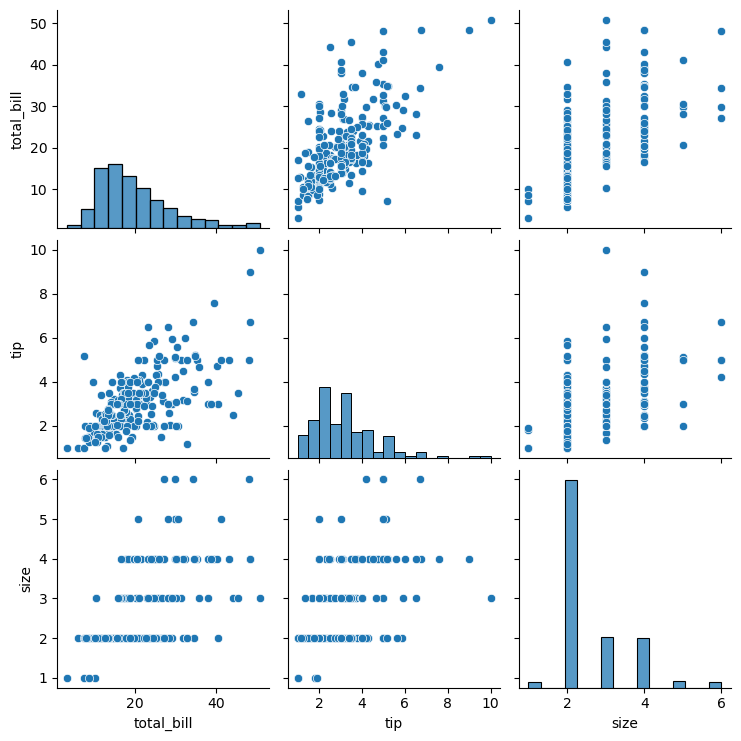

In [4]:
# Basic correlogram - alleen voor de numerieke variabelen
sns.pairplot(data)
plt.show()

#### categoriale variabelen vs een numerieke variabele

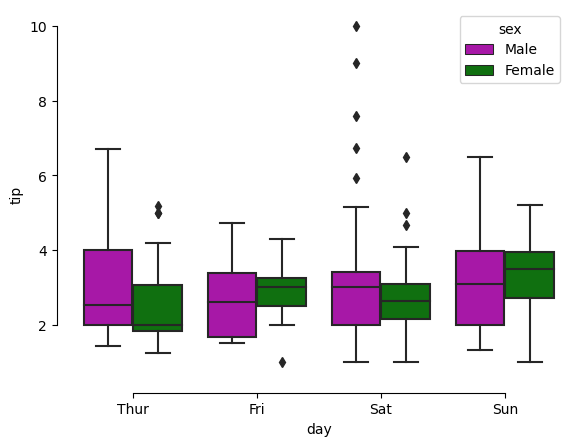

In [5]:
# Een geneste boxplot waarin verband dag, sex en tip te zien is
sns.boxplot(x="day", y="tip",
            hue="sex", palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)

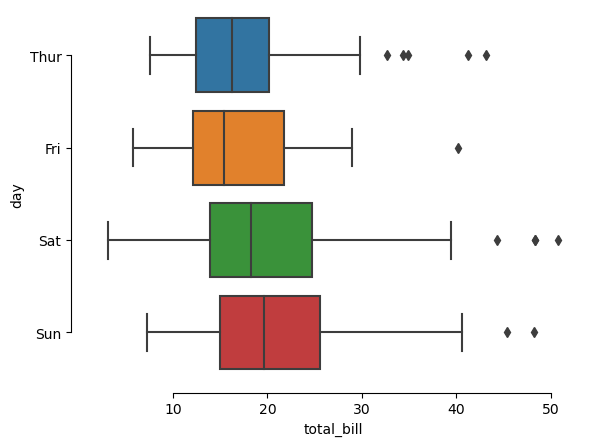

In [6]:
# Een waarin verband dag en de total_bill te zien is
sns.boxplot(x="total_bill", y="day", data=data)
sns.despine(offset=10, trim=True)

#### een categoriale vs een numerieke variabele

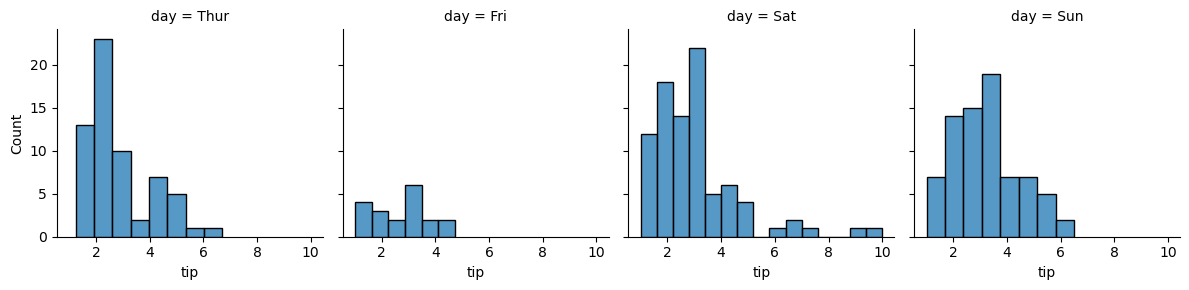

In [7]:
g = sns.FacetGrid(data, col="day")
g.map(sns.histplot, "tip")

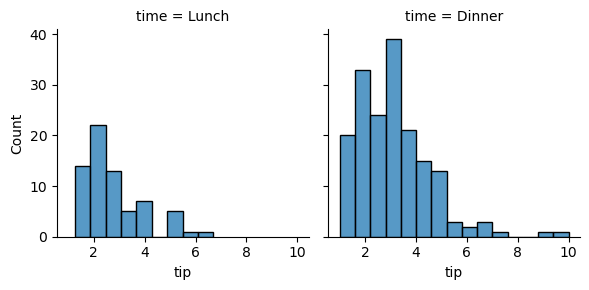

In [8]:
g = sns.FacetGrid(data, col="time")
g.map(sns.histplot, "tip")

Ga zelf na welke infomatie de plots hierboven je geven:
- Waar hebben we meer data van: lunch- of dinner gasten? Hoe is de hoogte van de fooi (verschillend) verdeeld voor beiden?
- Zelfde vraag voor de dagen vs de fooi
- Hoe verschilt ogenschijnlijk de spreiding van de hoogte van de totale rekening met de dagen?
- Is er een verschil in de spreiding van de hoogte van de fooi t.o.v. het geslacht van de (betalende) klant zichtbaar?

Suggestie voor vervolg: *Tech Report 2: Datapreparatie*

In [9]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']